In [2]:
import pandas as pd

In [3]:
empty_data = pd.read_csv('empty_data.csv', header=0, sep=';')
al_data = pd.read_csv('al_data.csv', header=0, sep=';')
fe_data = pd.read_csv('fe_data.csv', header=0, sep=';')

In [4]:
empty_data

,dR,dt
0,"0,1",1:16
1,"0,2",1:26
2,"0,3",1:33
3,"0,4",1:45
4,"0,5",1:47
5,"0,6",1:57
6,"0,7",2:01
7,"0,8",2:03
8,"0,9",2:16
9,1,2:22


In [5]:
al_data

,dR,dt
0,"0,1",2:39
1,"0,2",2:08
2,"0,3",2:17
3,"0,4",2:30
4,"0,5",2:44
5,"0,6",2:34
6,"0,7",2:58
7,"0,8",3:01


In [6]:
fe_data

,dR,dt
0,"0,1",1:51
1,"0,2",2:13
2,"0,3",2:24
3,"0,4",2:29
4,"0,5",2:41
5,"0,6",2:44


In [7]:
import numpy as np

In [8]:
def str_to_seconds(t):
    if type(t) is not int:
        m, s = map(int, t.split(':'))
        return 60 * m + s
    else:
        return t

In [9]:
def convert1(a):
    s = 0
    for i in range(len(a)):
        if type(a[i][0]) is not float:
            a[i][0] = float(a[i][0].replace(',', '.'))
        s += str_to_seconds(a[i][1])
        a[i][1] = s

In [10]:
emp1 = np.array(empty_data)
convert1(emp1)
emp1

array([[0.1, 76],
       [0.2, 162],
       [0.3, 255],
       [0.4, 360],
       [0.5, 467],
       [0.6, 584],
       [0.7, 705],
       [0.8, 828],
       [0.9, 964],
       [1.0, 1106],
       [1.1, 1260],
       [1.2, 1416],
       [1.3, 1581],
       [1.4, 1761]], dtype=object)

In [11]:
al1 = np.array(al_data)
convert1(al1)
al1

array([[0.1, 159],
       [0.2, 287],
       [0.3, 424],
       [0.4, 574],
       [0.5, 738],
       [0.6, 892],
       [0.7, 1070],
       [0.8, 1251]], dtype=object)

In [12]:
fe1 = np.array(fe_data)
convert1(fe1)
fe1

array([[0.1, 111],
       [0.2, 244],
       [0.3, 388],
       [0.4, 537],
       [0.5, 698],
       [0.6, 862]], dtype=object)

In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

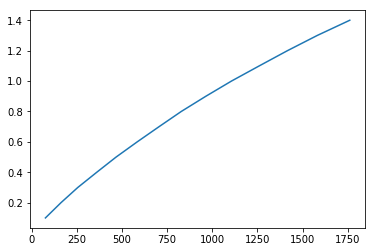

In [15]:
emp1 = np.transpose(emp1)
plt.plot(emp1[1], emp1[0])

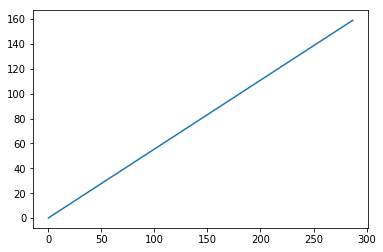

In [36]:
al1 = np.transpose(al1)
plt.plot(al1[1], al1[0])

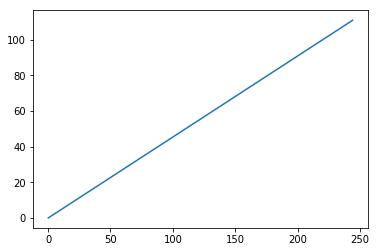

In [37]:
fe1 = np.transpose(fe1)
plt.plot(fe1[1], fe1[0])

In [38]:
def convert2(a):
    for i in range(len(a)):
        if type(a[i][0]) is not float:
            a[i][0] = float(a[i][0].replace(',', '.'))
        a[i][1] = str_to_seconds(a[i][1])

In [39]:
emp2 = np.array(empty_data)
convert2(emp2)
emp2

array([[0.1, 76],
       [0.2, 86],
       [0.3, 93],
       [0.4, 105],
       [0.5, 107],
       [0.6, 117],
       [0.7, 121],
       [0.8, 123],
       [0.9, 136],
       [1.0, 142],
       [1.1, 154],
       [1.2, 156],
       [1.3, 165],
       [1.4, 180]], dtype=object)

In [40]:
al2 = np.array(al_data)
convert2(al2)
al2

array([[0.1, 159],
       [0.2, 128],
       [0.3, 137],
       [0.4, 150],
       [0.5, 164],
       [0.6, 154],
       [0.7, 178],
       [0.8, 181]], dtype=object)

In [41]:
fe2 = np.array(fe_data)
convert2(fe2)
fe2

array([[0.1, 111],
       [0.2, 133],
       [0.3, 144],
       [0.4, 149],
       [0.5, 161],
       [0.6, 164]], dtype=object)

In [45]:
emp2 = np.transpose(emp2)
emp_r = []
emp_s = 18.044
for i in range(len(emp2[0])):
    emp_s += 0.1
    emp_r.append(round(emp_s, 3))
emp_r

[18.144,
 18.244,
 18.344,
 18.444,
 18.544,
 18.644,
 18.744,
 18.844,
 18.944,
 19.044,
 19.144,
 19.244,
 19.344,
 19.444]

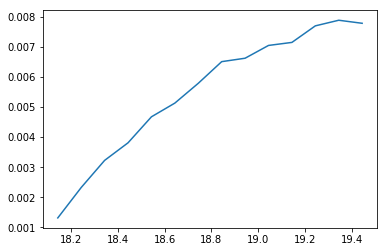

In [46]:
emp_drdt = emp2[0] / emp2[1]
plt.plot(emp_r, emp_drdt)

In [47]:
t_k = 22.
p_0 = 1e5
alpha = 4.28e-3
t_k, p_0, alpha

(22.0, 100000.0, 0.00428)

In [48]:
emp_c = (p_0 * np.array(emp_r) * alpha) / (emp_drdt * (1. + alpha * t_k))
emp_c

array([5393982.890984864, 3068678.950062148, 2224429.6263800543,
       1893857.7538933977, 1552315.9757256708, 1422121.298530379,
       1267396.6095321656, 1133316.3522702348, 1119775.6493058095,
       1057814.3452511516, 1048391.8988082181, 978591.942677488,
       960394.8234261901, 977896.7818757246], dtype=object)

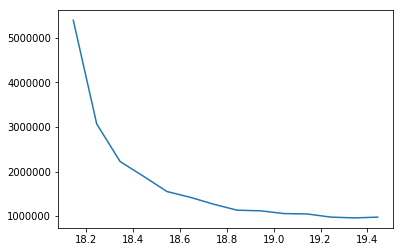

In [49]:
plt.plot(emp_r, emp_c)

In [51]:
al_m = 0.2947
fe_m = 0.8165